In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_inat = pd.read_csv('../notebooks/iNat_bird_counts_weekly.csv')

In [3]:
df_inat.sort_values(by='aviID_short', inplace=True)

In [4]:
df_ebird = pd.read_csv('../notebooks/ebird_data_135_weekly_nn.csv')

In [5]:
df_ebird.sort_values(by='AVIBASEID', inplace=True)

In [6]:
df_inat

,Unnamed: 0,aviID_short,week-0,week-1,week-2,week-3,week-4,week-5,week-6,week-7,...,week-42,week-43,week-44,week-45,week-46,week-47,week-48,week-49,week-50,week-51
76,76,00124D98,4,11,4,14,7,2,3,8,...,5,7,4,11,3,11,5,5,14,3
101,101,01060BFD,4,6,0,6,0,0,5,3,...,1,3,16,1,5,5,0,3,0,2
59,59,018B3169,7,7,3,8,3,2,0,9,...,1,2,6,5,1,3,1,1,6,9
96,96,03AC32BA,2,5,1,6,2,4,2,5,...,2,0,5,3,2,3,5,7,3,4
107,107,0413ED30,3,4,2,3,1,6,6,4,...,8,5,1,5,5,2,1,5,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,FC366114,5,4,3,8,9,6,4,8,...,1,1,1,7,5,1,1,5,6,1
112,112,FD2B0309,0,6,6,6,2,2,0,4,...,9,4,1,6,4,6,1,2,9,2
41,41,FED3756C,8,11,4,10,7,3,12,8,...,6,1,8,8,7,3,3,7,4,10
68,68,FF592882,6,6,4,9,5,6,7,23,...,7,13,5,6,4,7,7,13,7,8


In [7]:
df_ebird.groupby('AVIBASEID').sum()['OBSERVATION COUNT']

AVIBASEID
00124D98     290767
01060BFD    2305828
018B3169      18118
03AC32BA      97225
0413ED30     102218
             ...   
FC366114      15146
FD2B0309     361104
FED3756C      14940
FF592882     207166
FFF61080      44209
Name: OBSERVATION COUNT, Length: 135, dtype: int64

In [8]:
df_inat['sum'] = df_inat.values[:, 2:].sum(axis=1)

In [9]:
df_inat2 = df_inat[df_inat['aviID_short'].isin(df_ebird['AVIBASEID'])][['aviID_short', 'sum']]

In [10]:
df_inat2

,aviID_short,sum
76,00124D98,606
101,01060BFD,218
59,018B3169,119
96,03AC32BA,112
107,0413ED30,181
...,...,...
92,FC366114,304
112,FD2B0309,247
41,FED3756C,274
68,FF592882,507


In [11]:
df_ebird2 = df_ebird.groupby('AVIBASEID').sum()['OBSERVATION COUNT']

In [12]:
df_ebird2 = pd.DataFrame(df_ebird2).reset_index()

In [13]:
df_ebird2

,AVIBASEID,OBSERVATION COUNT
0,00124D98,290767
1,01060BFD,2305828
2,018B3169,18118
3,03AC32BA,97225
4,0413ED30,102218
...,...,...
130,FC366114,15146
131,FD2B0309,361104
132,FED3756C,14940
133,FF592882,207166


In [14]:
df_inat2

,aviID_short,sum
76,00124D98,606
101,01060BFD,218
59,018B3169,119
96,03AC32BA,112
107,0413ED30,181
...,...,...
92,FC366114,304
112,FD2B0309,247
41,FED3756C,274
68,FF592882,507


In [15]:
df_ebird2

,AVIBASEID,OBSERVATION COUNT
0,00124D98,290767
1,01060BFD,2305828
2,018B3169,18118
3,03AC32BA,97225
4,0413ED30,102218
...,...,...
130,FC366114,15146
131,FD2B0309,361104
132,FED3756C,14940
133,FF592882,207166


In [16]:
df_inat2['sum'].sum()

58820

In [17]:
df_ebird2['OBSERVATION COUNT'].sum()

160038754

In [18]:
df_inat2['rel_count'] = df_inat2['sum']/58820

In [19]:
df_ebird2['rel_count'] = df_ebird2['OBSERVATION COUNT']/160038754

In [20]:
df_inat2.sort_values(by='rel_count')

,aviID_short,sum,rel_count
135,3F9E1C51,100,0.0017
102,95E28A57,106,0.001802
121,6C74415D,107,0.001819
103,DE0971C1,110,0.00187
96,03AC32BA,112,0.001904
...,...,...,...
67,42393721,1475,0.025077
18,8601A467,1486,0.025264
17,49D9148A,1533,0.026063
56,85625D75,1821,0.030959


In [21]:
df_ebird2.sort_values(by='rel_count')

,AVIBASEID,OBSERVATION COUNT,rel_count
48,56036504,3,1.874546e-08
9,0B1B2EB6,34,2.124485e-07
12,115F04DD,55,3.436668e-07
95,B9EE9676,3864,2.414415e-05
60,6C74415D,5931,3.705977e-05
...,...,...,...
121,ED4CE8E7,2480088,1.549680e-02
40,466E9077,3215699,2.009325e-02
111,D3A260BC,5577501,3.485094e-02
50,575A3E3B,9724379,6.076265e-02


In [22]:
df_avibase = pd.read_csv('../data/ELEData/TraitData/AVONET1_BirdLife.csv')

In [23]:
df_avibase

,Sequence,Species1,Family1,Order1,Avibase.ID1,Total.individuals,Female,Male,Unknown,Complete.measures,...,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Min.Latitude,Max.Latitude,Centroid.Latitude,Centroid.Longitude,Range.Size
0,3103.0,Accipiter albogularis,Accipitridae,Accipitriformes,AVIBASE-BBB59880,5,2,0,3,4,...,1,2.0,Carnivore,Vertivore,Insessorial,-11.73,-4.02,-8.15,158.49,37461.21
1,3090.0,Accipiter badius,Accipitridae,Accipitriformes,AVIBASE-1A0ECB6E,10,4,6,0,8,...,2,3.0,Carnivore,Vertivore,Insessorial,-29.47,46.39,8.23,44.98,22374973.00
2,3125.0,Accipiter bicolor,Accipitridae,Accipitriformes,AVIBASE-ADBE44E1,11,4,5,2,8,...,2,2.0,Carnivore,Vertivore,Generalist,-55.72,23.73,-10.10,-59.96,14309701.27
3,3116.0,Accipiter brachyurus,Accipitridae,Accipitriformes,AVIBASE-68BF920B,4,4,0,0,3,...,1,2.0,Carnivore,Vertivore,Insessorial,-6.31,-4.08,-5.45,150.68,35580.71
4,3092.0,Accipiter brevipes,Accipitridae,Accipitriformes,AVIBASE-8492E4B7,8,4,4,0,4,...,1,3.0,Carnivore,Vertivore,Generalist,31.19,55.86,45.24,45.33,2936751.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004,3261.0,Trogon personatus,Trogonidae,Trogoniformes,AVIBASE-DEF06688,23,12,10,1,5,...,1,1.0,Omnivore,Omnivore,Insessorial,-20.40,11.16,-2.92,-71.92,745904.62
11005,3256.0,Trogon rufus,Trogonidae,Trogoniformes,AVIBASE-EB24DFEE,22,10,12,0,8,...,1,1.0,Omnivore,Omnivore,Insessorial,-29.64,16.03,-5.73,-61.12,6666233.02
11006,3255.0,Trogon surrucura,Trogonidae,Trogoniformes,AVIBASE-8F2D3109,4,2,2,0,4,...,1,1.0,Carnivore,Invertivore,Insessorial,-31.18,-10.87,-23.08,-51.01,1366931.00
11007,3252.0,Trogon violaceus,Trogonidae,Trogoniformes,AVIBASE-2123574A,28,11,16,1,14,...,1,1.0,Herbivore,Frugivore,Insessorial,-15.61,22.29,-0.57,-66.12,7284998.29


In [24]:
df_combined = df_ebird2.merge(df_inat2, how='left', left_on='AVIBASEID', right_on='aviID_short')

In [25]:
df_combined

,AVIBASEID,OBSERVATION COUNT,rel_count_x,aviID_short,sum,rel_count_y
0,00124D98,290767,0.001817,00124D98,606,0.010303
1,01060BFD,2305828,0.014408,01060BFD,218,0.003706
2,018B3169,18118,0.000113,018B3169,119,0.002023
3,03AC32BA,97225,0.000608,03AC32BA,112,0.001904
4,0413ED30,102218,0.000639,0413ED30,181,0.003077
...,...,...,...,...,...,...
130,FC366114,15146,0.000095,FC366114,304,0.005168
131,FD2B0309,361104,0.002256,FD2B0309,247,0.004199
132,FED3756C,14940,0.000093,FED3756C,274,0.004658
133,FF592882,207166,0.001294,FF592882,507,0.00862


In [26]:
df_avibase['aviID_short'] = df_avibase['Avibase.ID1'].apply(lambda x: x[8:].strip())

In [27]:
df_avibase['aviID_short']

0        BBB59880
1        1A0ECB6E
2        ADBE44E1
3        68BF920B
4        8492E4B7
           ...   
11004    DEF06688
11005    EB24DFEE
11006    8F2D3109
11007    2123574A
11008    BA2F0BFD
Name: aviID_short, Length: 11009, dtype: object

In [30]:
df_combined2 = df_combined.merge(df_avibase[['aviID_short', 'Species1']], how='left', left_on='AVIBASEID', right_on='aviID_short')

In [31]:
df_combined2

,AVIBASEID,OBSERVATION COUNT,rel_count_x,aviID_short_x,sum,rel_count_y,aviID_short_y,Species1
0,00124D98,290767,0.001817,00124D98,606,0.010303,00124D98,Zenaida macroura
1,01060BFD,2305828,0.014408,01060BFD,218,0.003706,01060BFD,Calidris mauri
2,018B3169,18118,0.000113,018B3169,119,0.002023,018B3169,Podiceps auritus
3,03AC32BA,97225,0.000608,03AC32BA,112,0.001904,03AC32BA,Larus glaucescens
4,0413ED30,102218,0.000639,0413ED30,181,0.003077,0413ED30,Arenaria melanocephala
...,...,...,...,...,...,...,...,...
130,FC366114,15146,0.000095,FC366114,304,0.005168,FC366114,Bubo virginianus
131,FD2B0309,361104,0.002256,FD2B0309,247,0.004199,FD2B0309,Plegadis chihi
132,FED3756C,14940,0.000093,FED3756C,274,0.004658,FED3756C,Haliaeetus leucocephalus
133,FF592882,207166,0.001294,FF592882,507,0.00862,FF592882,Poecile rufescens


In [32]:
df_combined2['rel_freq_diff'] = df_combined2['rel_count_x'] - df_combined2['rel_count_y']

In [33]:
df_combined2

,AVIBASEID,OBSERVATION COUNT,rel_count_x,aviID_short_x,sum,rel_count_y,aviID_short_y,Species1,rel_freq_diff
0,00124D98,290767,0.001817,00124D98,606,0.010303,00124D98,Zenaida macroura,-0.008486
1,01060BFD,2305828,0.014408,01060BFD,218,0.003706,01060BFD,Calidris mauri,0.010702
2,018B3169,18118,0.000113,018B3169,119,0.002023,018B3169,Podiceps auritus,-0.00191
3,03AC32BA,97225,0.000608,03AC32BA,112,0.001904,03AC32BA,Larus glaucescens,-0.001297
4,0413ED30,102218,0.000639,0413ED30,181,0.003077,0413ED30,Arenaria melanocephala,-0.002438
...,...,...,...,...,...,...,...,...,...
130,FC366114,15146,0.000095,FC366114,304,0.005168,FC366114,Bubo virginianus,-0.005074
131,FD2B0309,361104,0.002256,FD2B0309,247,0.004199,FD2B0309,Plegadis chihi,-0.001943
132,FED3756C,14940,0.000093,FED3756C,274,0.004658,FED3756C,Haliaeetus leucocephalus,-0.004565
133,FF592882,207166,0.001294,FF592882,507,0.00862,FF592882,Poecile rufescens,-0.007325


In [34]:
df_combined2['abs_rel_freq_diff'] = df_combined2['rel_freq_diff'].abs()

In [35]:
df_combined2

,AVIBASEID,OBSERVATION COUNT,rel_count_x,aviID_short_x,sum,rel_count_y,aviID_short_y,Species1,rel_freq_diff,abs_rel_freq_diff
0,00124D98,290767,0.001817,00124D98,606,0.010303,00124D98,Zenaida macroura,-0.008486,0.008486
1,01060BFD,2305828,0.014408,01060BFD,218,0.003706,01060BFD,Calidris mauri,0.010702,0.010702
2,018B3169,18118,0.000113,018B3169,119,0.002023,018B3169,Podiceps auritus,-0.00191,0.00191
3,03AC32BA,97225,0.000608,03AC32BA,112,0.001904,03AC32BA,Larus glaucescens,-0.001297,0.001297
4,0413ED30,102218,0.000639,0413ED30,181,0.003077,0413ED30,Arenaria melanocephala,-0.002438,0.002438
...,...,...,...,...,...,...,...,...,...,...
130,FC366114,15146,0.000095,FC366114,304,0.005168,FC366114,Bubo virginianus,-0.005074,0.005074
131,FD2B0309,361104,0.002256,FD2B0309,247,0.004199,FD2B0309,Plegadis chihi,-0.001943,0.001943
132,FED3756C,14940,0.000093,FED3756C,274,0.004658,FED3756C,Haliaeetus leucocephalus,-0.004565,0.004565
133,FF592882,207166,0.001294,FF592882,507,0.00862,FF592882,Poecile rufescens,-0.007325,0.007325


In [36]:
import seaborn as sns

<Axes: xlabel='Species1', ylabel='rel_count_x'>

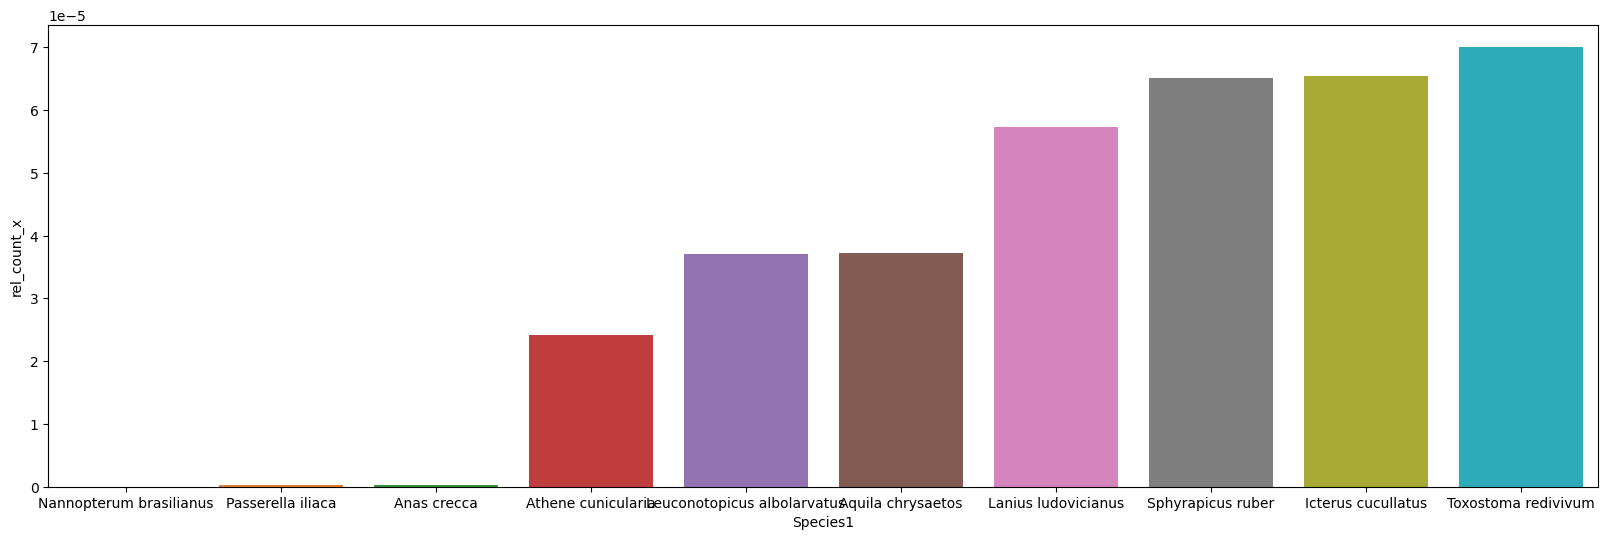

In [59]:
data_displayed = df_combined2.sort_values(by='rel_count_x').iloc[0:10, :]
fig, axes = plt.subplots(1,1,figsize=(20,6))
sns.barplot(data_displayed, x='Species1', y='rel_count_x')

<Axes: xlabel='Species1', ylabel='rel_count_x'>

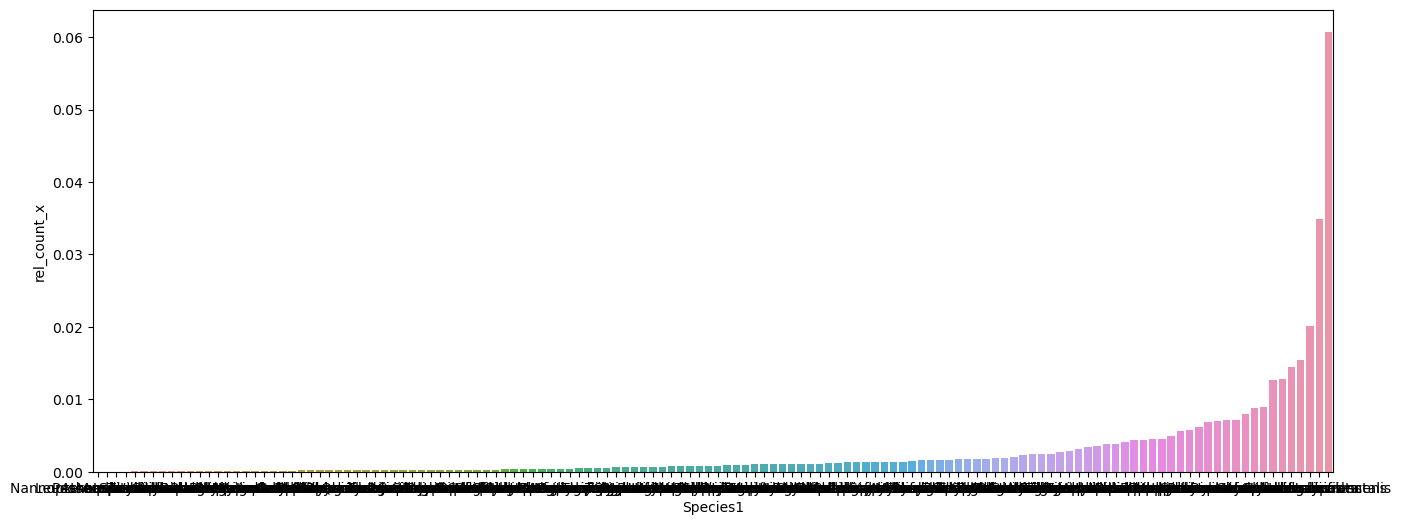

In [54]:
data_displayed = df_combined2.sort_values(by='rel_count_x').iloc[:134, :]
fig, axes = plt.subplots(1,1,figsize=(16,6))
sns.barplot(data_displayed, x='Species1', y='rel_count_x')

<Axes: xlabel='Species1', ylabel='rel_count_y'>

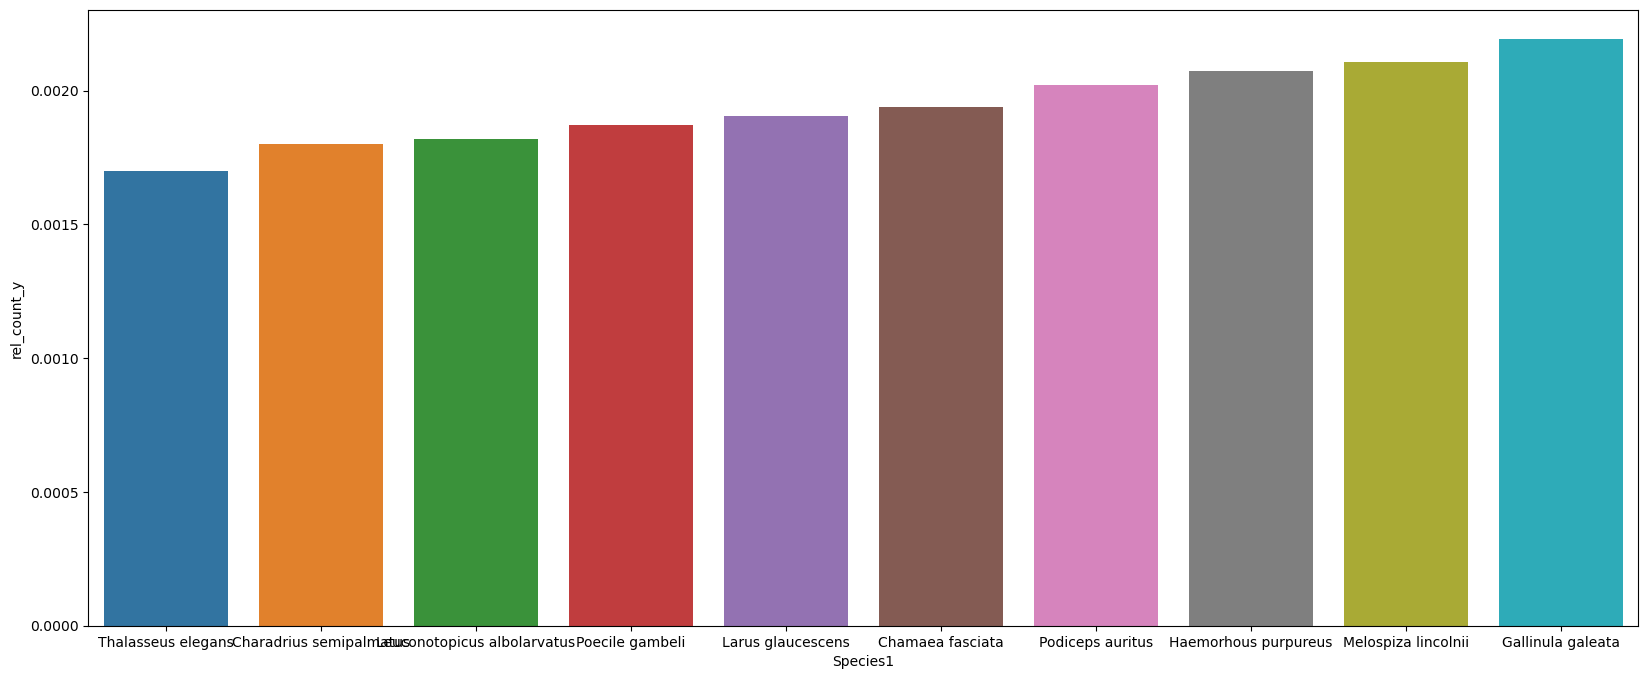

In [61]:
data_displayed = df_combined2.sort_values(by='rel_count_y').iloc[0:10, :]
fig, axes = plt.subplots(1,1,figsize=(20,8))
sns.barplot(data_displayed, x='Species1', y='rel_count_y')

<Axes: xlabel='Species1', ylabel='rel_freq_diff'>

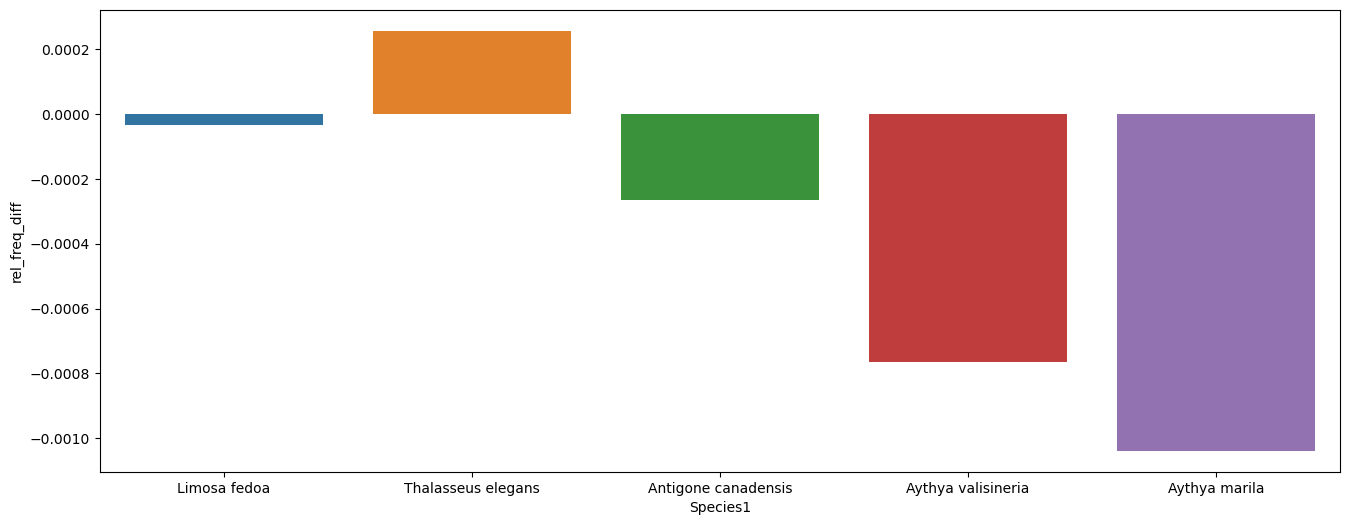

In [46]:
data_displayed = df_combined2.sort_values(by='abs_rel_freq_diff').iloc[0:5, :]
fig, axes = plt.subplots(1,1,figsize=(16,6))
sns.barplot(data_displayed, x='Species1', y='rel_freq_diff')

<Axes: xlabel='Species1', ylabel='rel_freq_diff'>

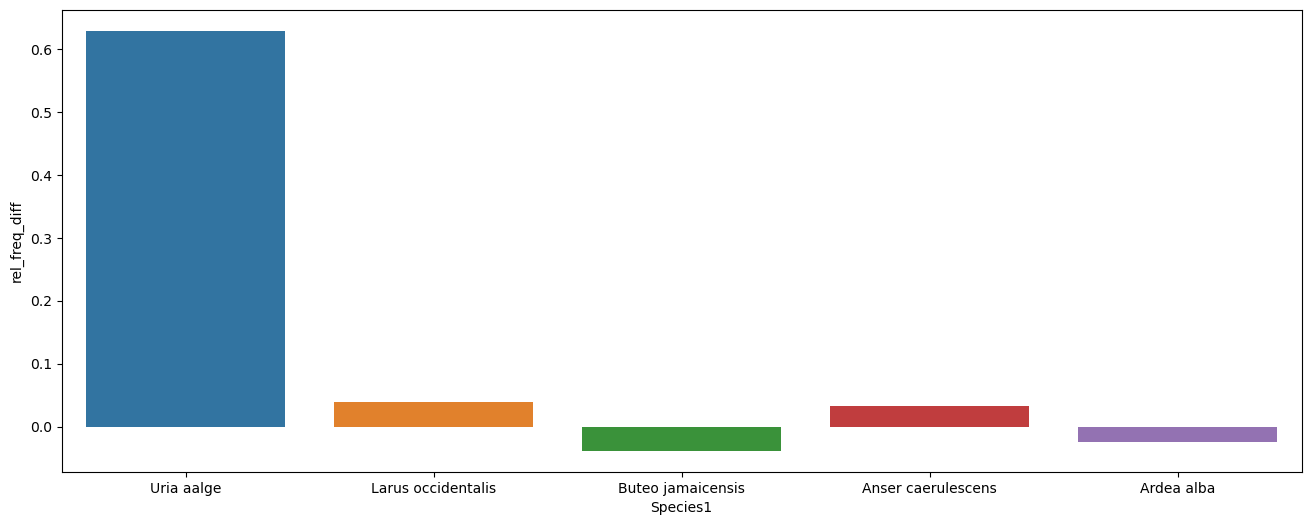

In [47]:
data_displayed = df_combined2.sort_values(by='abs_rel_freq_diff', ascending=False).iloc[0:5, :]
fig, axes = plt.subplots(1,1,figsize=(16,6))
sns.barplot(data_displayed, x='Species1', y='rel_freq_diff')

# Label the direction for whcih dataset is being used here

<Axes: xlabel='Species1', ylabel='rel_freq_diff'>

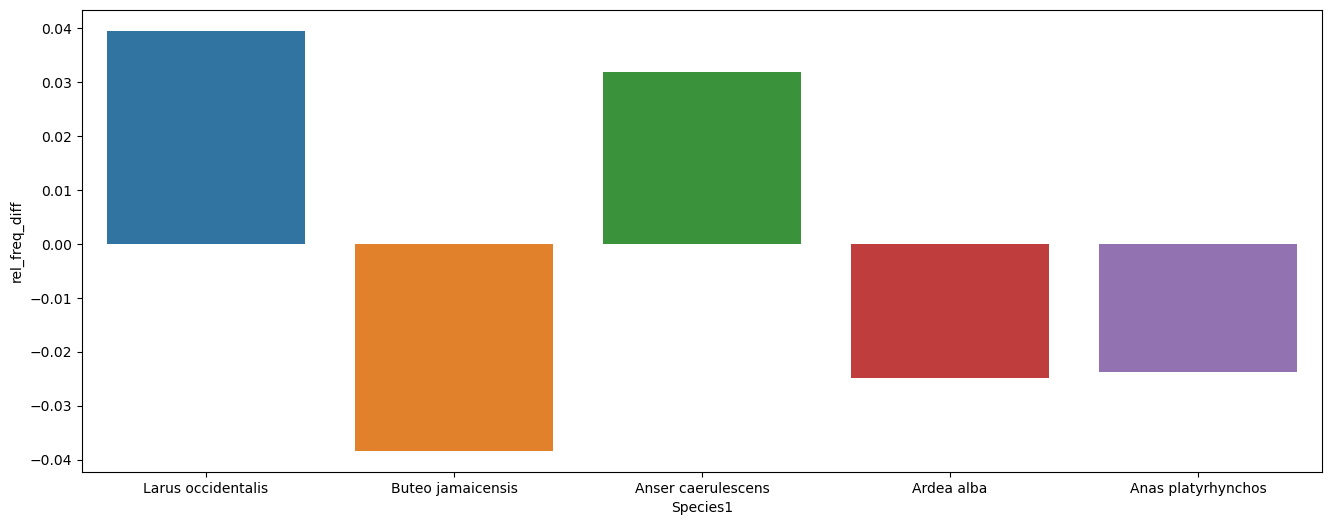

In [48]:
data_displayed = df_combined2.sort_values(by='abs_rel_freq_diff', ascending=False).iloc[1:6, :]
fig, axes = plt.subplots(1,1,figsize=(16,6))
sns.barplot(data_displayed, x='Species1', y='rel_freq_diff')

<Axes: xlabel='rel_freq_diff', ylabel='Density'>

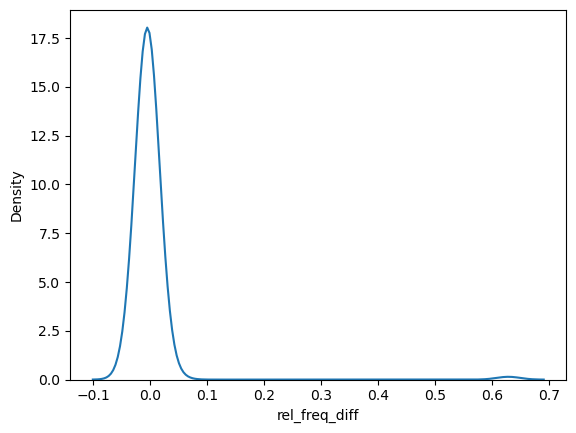

In [50]:
sns.kdeplot(df_combined2['rel_freq_diff'])

<Axes: xlabel='rel_freq_diff', ylabel='Count'>

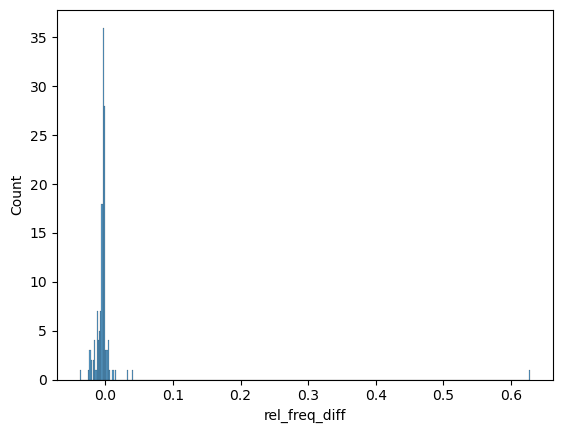

In [51]:
sns.histplot(df_combined2['rel_freq_diff'])

<Axes: xlabel='rel_freq_diff', ylabel='Count'>

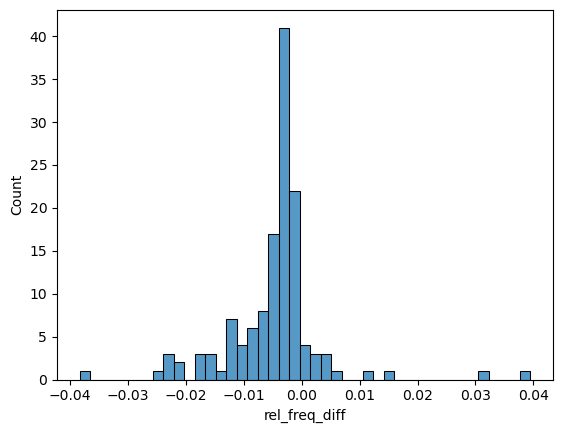

In [52]:
sns.histplot(df_combined2.sort_values(by='abs_rel_freq_diff', ascending=False).iloc[1:, :]['rel_freq_diff'])